In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from tqdm.notebook import tqdm
warnings.filterwarnings("ignore")
%matplotlib inline 
import tensorflow as tf
from keras.utils import load_img
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,Input

In [36]:
bse_dir = "C:/Users/HARISUDHAN/Downloads/archive (7)/UTKFace"

In [37]:
image_paths = []
age_labels = []
gender_labels = []
for filename in tqdm(os.listdir(bse_dir)):
    image_path = os.path.join(bse_dir,filename)
    temp = filename.split("_")
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)
    

  0%|          | 0/23708 [00:00<?, ?it/s]

In [38]:
# converting into data frame
data = pd.DataFrame()
data["image"],data["age"],data["gender"] = image_paths,age_labels,gender_labels
data.head(20)

image  age  gender
0   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       0
1   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       0
2   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
3   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
4   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
5   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
6   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
7   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
8   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
9   C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
10  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  100       1
11  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  101       0
12  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  101       1
13  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  103       0
14  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  105       0
15  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  105       1
16  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  105       1
17  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  105       1
18  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...  105       1
19  C:/Users/HARISUDHAN/Downloads/archive (7)/UTKF...   10       0

In [39]:
# mapping labels for gender
gender_dict = {0:"Male",1:"Female"}

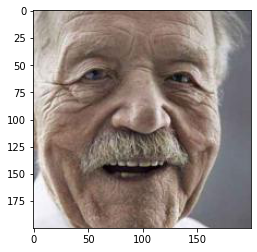

In [40]:
from PIL import Image
img = Image.open(data["image"][0])
plt.imshow(img)

<AxesSubplot:xlabel='age', ylabel='Density'>

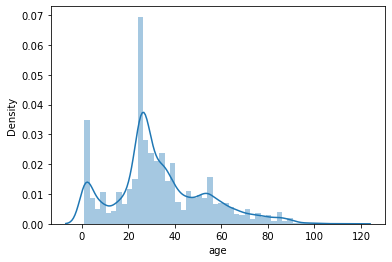

In [41]:
sns.distplot(data["age"])

<AxesSubplot:xlabel='gender', ylabel='count'>

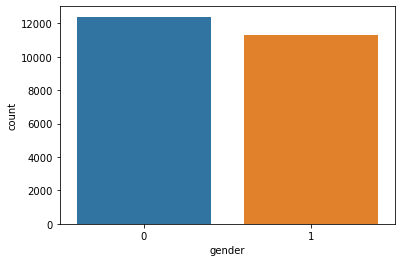

In [42]:
sns.countplot(data["gender"])

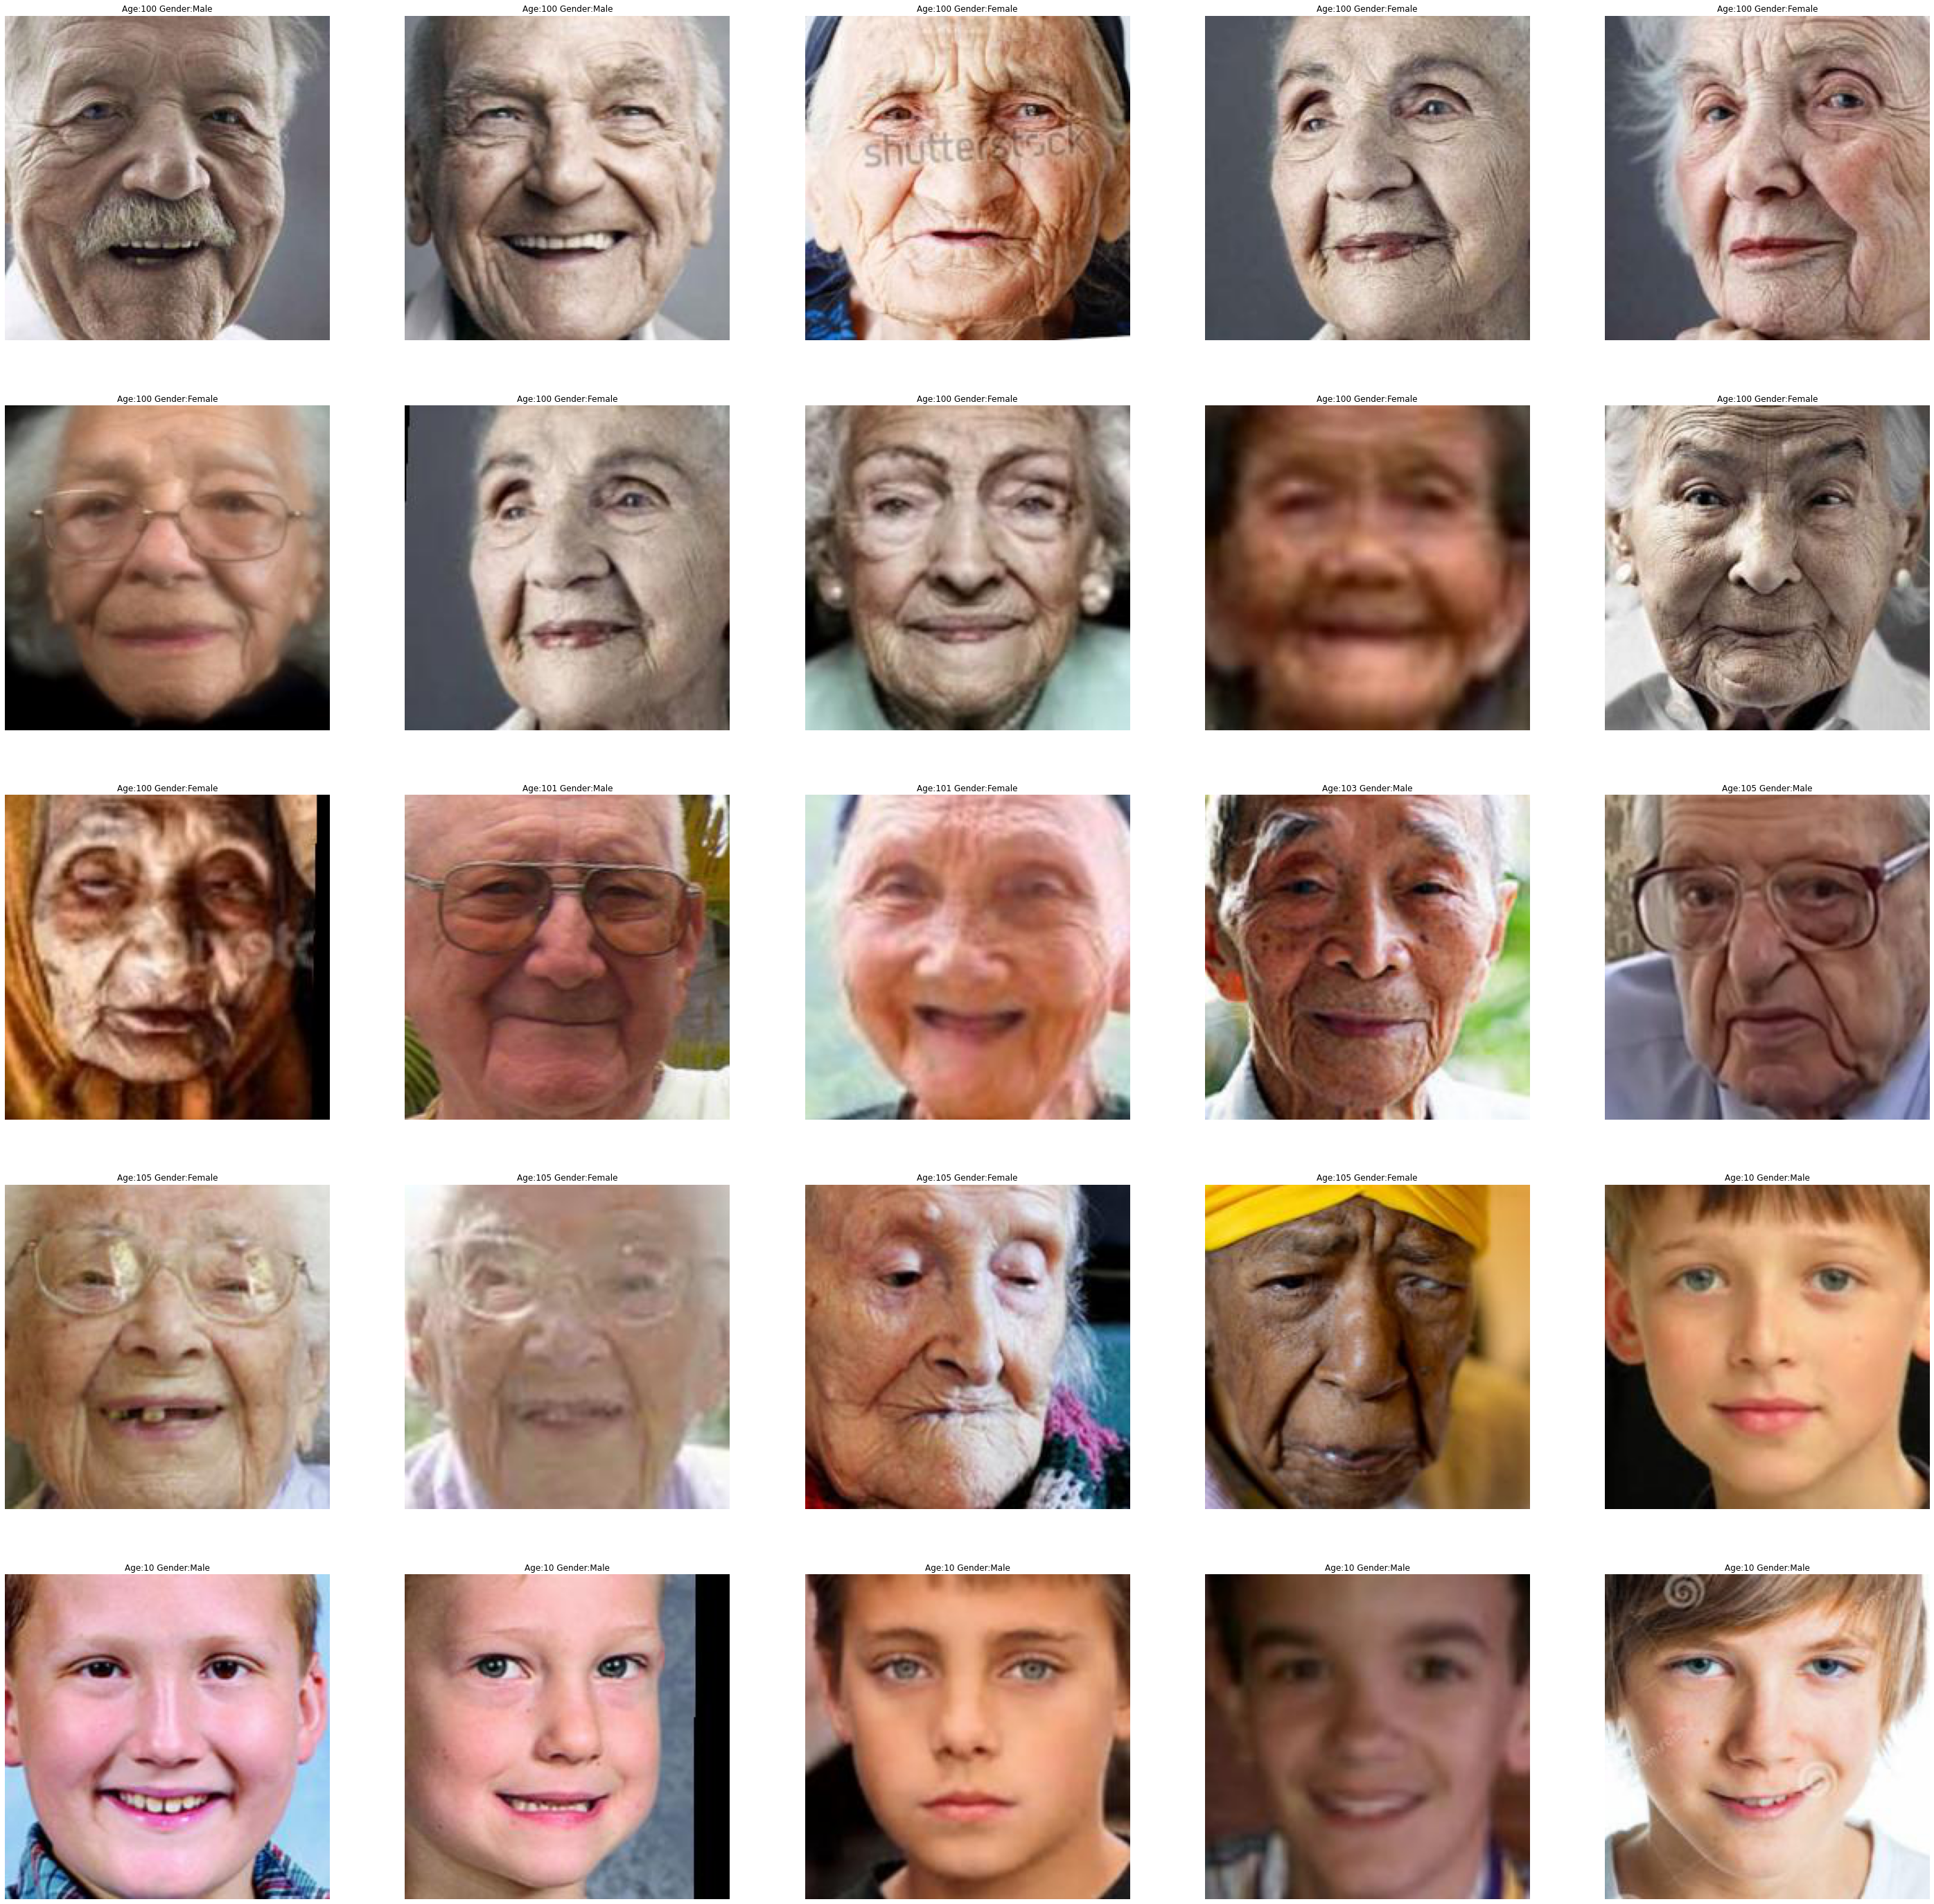

In [43]:
# displaying grid of images
plt.figure(figsize=(50,50))
files = data.iloc[0:25]
for index,files,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img = load_img(files)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age:{age} Gender:{gender_dict[gender]}")
    plt.axis("off")

In [44]:
# feature extraction
def extracts(images):
    feature = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = img.resize((128,128),Image.ANTIALIAS)
        img = np.array(img)
        feature.append(img)
    feature = np.array(feature)
    features = feature.reshape(len(feature),128,128,1)
    return features

In [45]:
x = extracts(data["image"])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [46]:
x.shape

(23708, 128, 128, 1)

In [47]:
# normalize the images
x = x/255.0

In [48]:
y_gender = np.array(data["gender"])
y_age = np.array(data["age"])

In [49]:
input_shape = (128,128,1)

In [50]:
# model creation
inputs = Input(input_shape)
con_1 = Conv2D(32,kernel_size = (3,3),activation = "relu") (inputs)
maxp_1 = MaxPooling2D(pool_size = (2,2)) (con_1)
con_2 = Conv2D(64,kernel_size = (3,3),activation = "relu") (maxp_1)
maxp_2 = MaxPooling2D(pool_size = (2,2)) (con_2)
con_3 = Conv2D(128,kernel_size = (3,3),activation = "relu") (maxp_2)
maxp_3 = MaxPooling2D(pool_size = (2,2)) (con_3)
con_4 = Conv2D(256,kernel_size = (3,3),activation = "relu") (maxp_3)
maxp_4 = MaxPooling2D(pool_size = (2,2)) (con_4)

flatten = Flatten() (maxp_4)

# dense layers
dense_1 = Dense(256,activation = "relu") (flatten)
dense_2 = Dense(256,activation = "relu") (flatten)

dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

output_1 = Dense(1,activation = "sigmoid",name = "gender_output") (dropout_1)
output_2 = Dense(1,activation = "relu",name = "age_out") (dropout_2)

model = Model(inputs = [inputs],outputs = [output_1,output_2])
model.compile(loss = ["binary_crossentropy","mae"],optimizer = "adam",metrics = ["accuracy"])

In [51]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 126, 126, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 63, 63, 32)   0           ['conv2d[0][0]']                 
                                                                                              

In [52]:
!pip install pydot

In [53]:
!pip install graphviz

In [54]:
# plot model
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [55]:
# train model
history = model.fit(x=x,y=[y_gender,y_age],batch_size = 32,epochs = 30,validation_split = 0.2)

Epoch 1/30
593/593 [==============================] - 257s 430ms/step - loss: 10.5053 - gender_output_loss: 0.6428 - age_out_loss: 9.8625 - gender_output_accuracy: 0.5941 - age_out_accuracy: 0.0551 - val_loss: 35.9456 - val_gender_output_loss: 0.5971 - val_age_out_loss: 35.3485 - val_gender_output_accuracy: 0.6995 - val_age_out_accuracy: 0.0000e+00
Epoch 2/30
593/593 [==============================] - 276s 466ms/step - loss: 7.7466 - gender_output_loss: 0.4225 - age_out_loss: 7.3241 - gender_output_accuracy: 0.8019 - age_out_accuracy: 0.0237 - val_loss: 25.9843 - val_gender_output_loss: 0.4942 - val_age_out_loss: 25.4902 - val_gender_output_accuracy: 0.7720 - val_age_out_accuracy: 0.0000e+00
Epoch 3/30
593/593 [==============================] - 280s 472ms/step - loss: 6.9981 - gender_output_loss: 0.3437 - age_out_loss: 6.6543 - gender_output_accuracy: 0.8445 - age_out_accuracy: 0.0118 - val_loss: 24.6963 - val_gender_output_loss: 0.4879 - val_age_out_loss: 24.2083 - val_gender_output_a

<Figure size 432x288 with 0 Axes>

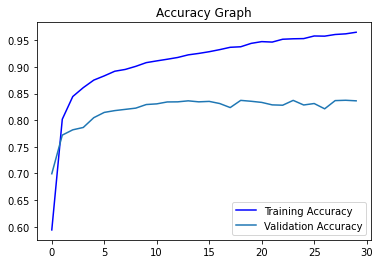

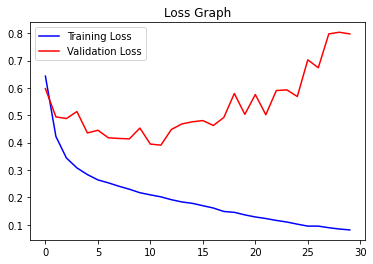

<Figure size 432x288 with 0 Axes>

In [56]:
acc = history.history["gender_output_accuracy"]
val_acc = history.history["val_gender_output_accuracy"]
epochs = range(len(acc))
plt.plot(epochs,acc,"b",label = "Training Accuracy")
plt.plot(epochs,val_acc,label = "Validation Accuracy")
plt.title("Accuracy Graph")
plt.legend()
plt.figure()

loss = history.history["gender_output_loss"]
val_loss = history.history["val_gender_output_loss"]
epochs = range(len(acc))

plt.plot(epochs,loss,"b",label = "Training Loss")
plt.plot(epochs,val_loss,"r",label = "Validation Loss")
plt.title("Loss Graph")
plt.legend()
plt.figure()



Original Gender :  Female Original Age :  -5
1/1 [==============================] - 0s 113ms/step
Predicted Age : 15
Predicted Gender :  Male


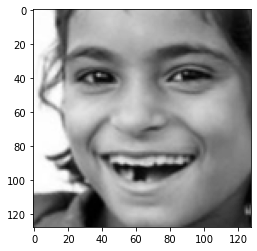

In [57]:
image_index = -5
print("Original Gender : ",gender_dict[y_gender[image_index]],"Original Age : ",image_index)
pred = model.predict(x[image_index].reshape(1,128,128,1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Age :",pred_age)
print("Predicted Gender : ",pred_gender)
plt.imshow(x[image_index].reshape(128,128),cmap = "gray")

In [1]:
import pickle

In [11]:
import matplotlib.pyplot as plt


In [4]:
import cv2

In [5]:
import numpy as np

In [16]:

image = cv2.imread('ooooooooooooo6.jpg.chip.jpg')
cv2.imshow('Original', image)
cv2.waitKey(0)

# Use the cvtColor() function to grayscale the image
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(128,128))

In [65]:
img.shape

(128, 128)

In [1]:
import pickle

In [2]:
md = pickle.load(open("C:/Users/HARISUDHAN/Documents/Age and Gender detection cnn/gender","rb"))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-07 15:27:20         6888
metadata.json                                  2023-04-07 15:27:20           64
variables.h5                                   2023-04-07 15:27:20     61356328
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\conv2d_3
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\flatten
......vars
...layers\input_layer
......vars
...layers\max_pooling2d
......vars
...layers\max_poolin

1/1 [==============================] - 0s 28ms/step
Predicted Age : 0
Predicted Gender :  Male


[array([[0.]], dtype=float32), array([[0.43754458]], dtype=float32)]

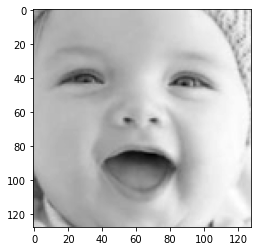

In [12]:
pred = md.predict(img.reshape(1,128,128,1))
gender_dict = {0:"Male",1:"Female"}
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Age :",pred_age)
print("Predicted Gender : ",pred_gender)
plt.imshow(img.reshape(128,128),cmap = "gray")
pred